In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



print(tf.__version__)

2.0.0


## Importing the data

(Also removing the "row.names" column since it is not needed for this process)

In [2]:
# reading from the file
file_path = "~/Desktop/BA6/SHS/midterm/P1.data"
data =  pd.read_csv(file_path, delimiter=",")

# Removing "row.names"
data = data.drop("row.names", axis=1)


In [3]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Splitting data
The first 400 instances as training data and the remaining data as test data (62 instances remaining)


In [4]:
# Splitting data into training set and testing set (training set : first 400 rows, testing set : the rest of the data)
train_data = data[:400]
test_data = data[400:]


In [5]:
# Last 10 rows of training set
train_data.tail(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
390,130,0.54,3.63,22.03,1,69,24.34,12.86,39,1
391,154,2.40,5.63,42.17,1,59,35.07,12.86,50,1
392,178,0.95,4.75,21.06,0,49,23.74,24.69,61,0
393,180,3.57,3.57,36.10,0,36,26.70,19.95,64,0
394,134,12.50,2.73,39.35,0,48,35.58,0.00,48,0
395,142,0.00,3.54,16.64,0,58,25.97,8.36,27,0
396,162,7.00,7.67,34.34,1,33,30.77,0.00,62,0
397,218,11.20,2.77,30.79,0,38,24.86,90.93,48,1
398,126,8.75,6.06,32.72,1,33,27.00,62.43,55,1
399,126,0.00,3.57,26.01,0,61,26.30,7.97,47,0


In [6]:
# First 10 rows of testing set
test_data.head(10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
400,134,6.10,4.77,26.08,0,47,23.82,1.03,49,0
401,132,0.00,4.17,36.57,0,57,30.61,18.00,49,0
402,178,5.50,3.79,23.92,1,45,21.26,6.17,62,1
403,208,5.04,5.19,20.71,1,52,25.12,24.27,58,1
404,160,1.15,10.19,39.71,0,31,31.65,20.52,57,0
405,116,2.38,5.67,29.01,1,54,27.26,15.77,51,0
406,180,25.01,3.70,38.11,1,57,30.54,0.00,61,1
407,200,19.20,4.43,40.60,1,55,32.04,36.00,60,1
408,112,4.20,3.58,27.14,0,52,26.83,2.06,40,0
409,120,0.00,3.10,26.97,0,41,24.80,0.00,16,0


In [7]:
test_data.shape
# test_data : 62x10 matrix

(62, 10)

In [8]:
# Splitting training data to label and features
train_label = train_data["chd"]
train_features = train_data.drop("chd", axis=1)

# Splitting test data to label and features
test_label = test_data["chd"]
test_features = test_data.drop("chd", axis=1)

## Preprocessing the features

All features except "famhist" are numerical. "famhist" is binary.


### Rescaling of data


In [9]:
# define min max scaler
scaler = MinMaxScaler()
# transform data (since we're just rescaling the features, the transformation won't do anything to the column "famhist" which is a binary feature, but already in the range [0, 1])

train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.fit_transform(test_features)




## Building the Model


In [10]:
# Parameters
training_epochs = 100

# Network Parameters
h1 = 8 # number of neurons in 1st hidden layer
h2 = 16 # number of neurons in 2nd hidden layer

In [32]:
# define the keras model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(h1, activation='sigmoid'), #hidden layer 1
    tf.keras.layers.Dense(h2, activation ='sigmoid'), #hidden layer 2
    tf.keras.layers.Dense(1, activation ='sigmoid') #output layer
])


#sigmoid(x) = 1 / (1 + exp(-x))

In [33]:
# function to calculate logistic regression log likelihood
def log_likelihood(actual, predicted):
	log_likelihood = 0.0
	for i in range(len(actual)):
		log_likelihood += (actual[i]*log(predicted[i]) +(1-actual[i])*log(1-predicted[i]))
	return -log_likelihood


In [34]:
# compile the keras model
#model.compile(loss=log_likelihood, optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), metrics=['accuracy'])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), metrics=['accuracy'])

#Using Binary Cross entropy loss function since it is equal up to a contant with the logistic regression log likelihood




In [35]:
train_label = np.array(train_label)
train_scaled = np.array(train_scaled)
history = model.fit(x=train_scaled,  y=train_label, epochs= training_epochs)

Train on 400 samples
Epoch 1/100
400/400 [==============================] - 1s 1ms/sample - loss: 0.6553 - accuracy: 0.6450
Epoch 2/100
400/400 [==============================] - 0s 56us/sample - loss: 0.6555 - accuracy: 0.6450
Epoch 3/100
400/400 [==============================] - 0s 48us/sample - loss: 0.6485 - accuracy: 0.6450
Epoch 4/100
400/400 [==============================] - 0s 50us/sample - loss: 0.6451 - accuracy: 0.6450
Epoch 5/100
400/400 [==============================] - 0s 45us/sample - loss: 0.6394 - accuracy: 0.6450
Epoch 6/100
400/400 [==============================] - 0s 52us/sample - loss: 0.6353 - accuracy: 0.6450
Epoch 7/100
400/400 [==============================] - 0s 54us/sample - loss: 0.6279 - accuracy: 0.6450
Epoch 8/100
400/400 [==============================] - 0s 49us/sample - loss: 0.6199 - accuracy: 0.6450
Epoch 9/100
400/400 [==============================] - 0s 47us/sample - loss: 0.6125 - accuracy: 0.6450
Epoch 10/100
400/400 [======================

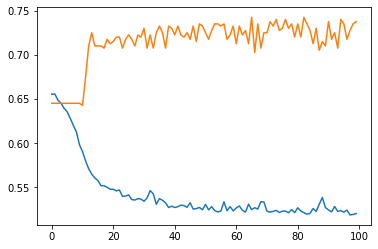

In [36]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# plotting the loss and accuracy
plt.plot(history_df['loss'], label = "loss")
plt.plot(history_df['accuracy'], label = "accuracy")
#history_df['loss'].plot(label = "loss");
#history_df['accuracy'].plot(label = "accuracy");

# Evaluate accuracy


In [39]:
test_scaled = np.array(test_scaled)
test_label = np.array(test_label)
test_loss, test_acc = model.evaluate(test_scaled,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest error', test_loss)

62/1 - 0s - loss: 0.5333 - accuracy: 0.7742

Test accuracy: 0.7741935

Test error 0.4921703415532266
